In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the dataset to python environment
data=pd.read_excel('iris (1).xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Checking the number of rows and columns

In [5]:
data.shape

(150, 5)

## Preprocessing

In [6]:
# Checking for missing values

In [7]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [8]:
# Filling the missing values

In [9]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

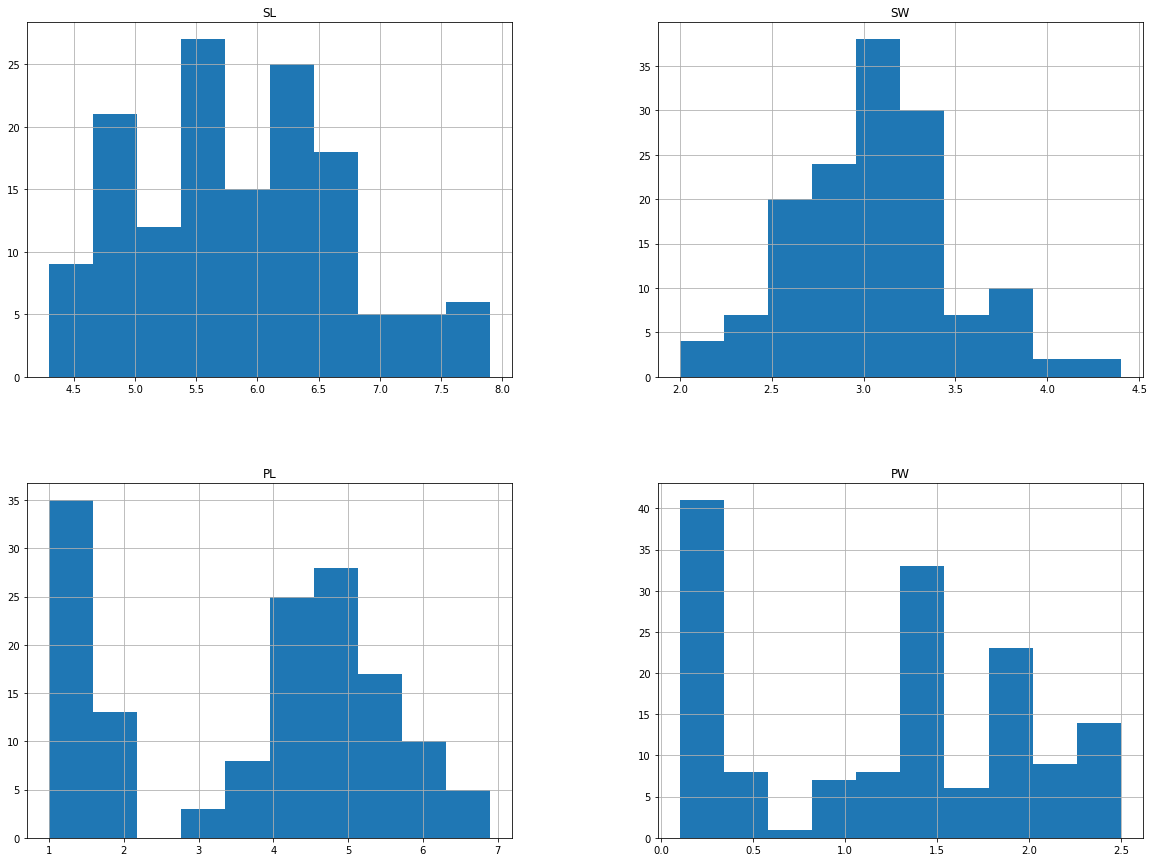

In [10]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [11]:
# Here the data distribution is  almost symmetric,so we can eplace the missing values with mean

In [12]:
for i in['SL','SW','PL']:
    data[i]=data[i].fillna(data[i].mean())

In [13]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [14]:
# Checking for outliers

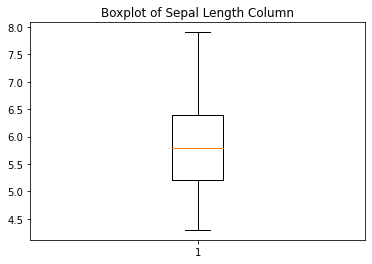

In [15]:
plt.boxplot(data['SL'])
plt.title("Boxplot of Sepal Length Column")
plt.show()

In [16]:
#here is no outliers

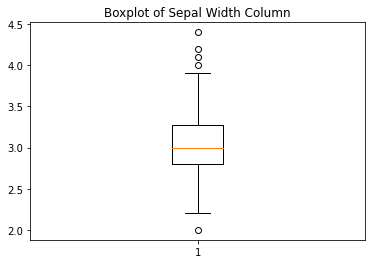

In [17]:
plt.boxplot(data['SW'])
plt.title("Boxplot of Sepal Width Column")
plt.show()

In [18]:
# here is 5 outliers.since it is very small in number there is no need of dropping the outlier

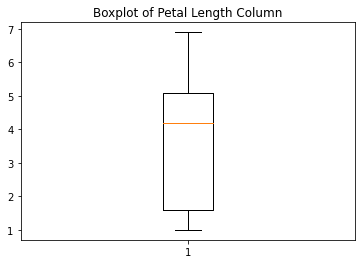

In [19]:
plt.boxplot(data['PL'])
plt.title("Boxplot of Petal Length Column")
plt.show()

In [20]:
# here is no outliers

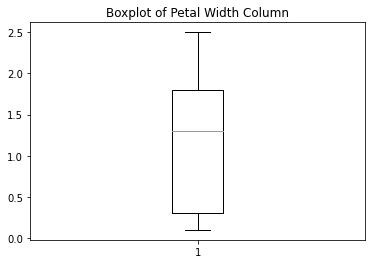

In [21]:
plt.boxplot(data['PW'])
plt.title("Boxplot of Petal Width Column")
plt.show()

In [22]:
#here is no outliers

In [23]:
data["Classification"].nunique()

3

In [24]:
# here classification column contain categorical variable.so we need to encode classification column.Here we use label encoding.

In [25]:
# Label Encoding

In [26]:
# importing libraries for label encoding

In [27]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [28]:
label_encoder=LabelEncoder()
data['Classification']=label_encoder.fit_transform(data['Classification'])

In [29]:
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


## Classification Models

In [30]:
# Seperating the data into dependent and independent variables. Here we take Classification as target or dependent variable.

In [31]:
X=data.drop('Classification',axis=1)
y=data['Classification']

In [32]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Model 1- Logistic Regression

In [34]:
#importing the libraries for logistic regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [36]:
# Implementing Logistic Regression Model

In [37]:
# Instantiate learning model
logit_model=LogisticRegression()
# Fitting the model
logit_model=logit_model.fit(X_train,y_train)
# Predicting the Test set results
y_pred_logit=logit_model.predict(X_test)

Evaluating Predictions

In [38]:
# Confusion Matrix

In [39]:
confusion_matrix(y_test,y_pred_logit)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [40]:
# accuracy score

In [41]:
accuracy_score(y_test,y_pred_logit)

1.0

## Model 2-KNN Model

In [42]:
# importing libraries for KNN model

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
metric_k=[]
neighbors= range(3,15)

for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k)
    classifier= classifier.fit(X_train,y_train)
    y_pred_kNN= classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred_kNN)
    metric_k.append(acc)

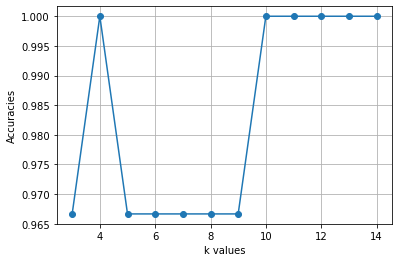

In [45]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()

In [46]:
# Instantiate learning model
classifier= KNeighborsClassifier(n_neighbors=5)
# Fitting the model
classifier= classifier.fit(X_train,y_train)
# Predicting the Test set results
y_pred_kNN= classifier.predict(X_test)

Evaluating Predictions

In [47]:
# Confusion Matrix

In [48]:
confusion_matrix(y_test,y_pred_kNN)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [49]:
# Accuracy Score

In [50]:
accuracy_score(y_test,y_pred_kNN)

0.9666666666666667

## Model 3- Support Vector Machine Model

In [51]:
# Importing libraries for SVM model

In [52]:
from sklearn.svm import SVC

In [53]:
#SVM with linear kernel

In [54]:
# Instantiate learning model
svm_clf=SVC(kernel='linear')
# Fitting the model
svm_clf=svm_clf.fit(X_train,y_train)
# Predicting the Test set results
y_pred_svm=svm_clf.predict(X_test)

Evaluating Predictions

In [55]:
# Confusion Matrix

In [56]:
confusion_matrix(y_test,y_pred_svm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [57]:
# Accuracy Score
accuracy_score(y_test,y_pred_svm)

1.0

In [58]:
# SVM with RBF kernel

In [59]:
# Instantiate learning model
svm_clf2=SVC(kernel='rbf')
# Fitting the model
svm_clf2=svm_clf2.fit(X_train,y_train)
# Predicting the Test set results
y_pred_svm=svm_clf2.predict(X_test)

Evaluating Predictions

In [60]:
# Confusion Matrix
confusion_matrix(y_test,y_pred_svm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [61]:
# Accuracy Score
accuracy_score(y_test,y_pred_svm)

1.0

## Model 4- Decision Tree Classifier

In [62]:
# importing libraries for decision tree classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
# Instantiate learning model
dt_clf=DecisionTreeClassifier()
# Fitting the model
dt_clf=dt_clf.fit(X_train,y_train)
# Predicting the Test set results
y_pred_dt=dt_clf.predict(X_test)

Evaluating Predictions

In [65]:
# Confusion Matrix
confusion_matrix(y_test,y_pred_dt)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [66]:
# Accuracy Score
accuracy_score(y_test,y_pred_dt)

1.0

## Method 5- Random Forest Algorithm

In [67]:
# importing libraries for random forest algorithm

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
# Instantiate learning model
rf_clf=RandomForestClassifier()
# Fitting the model
rf_clf=rf_clf.fit(X_train,y_train)
# Predicting the Test set results
y_pred_rf=rf_clf.predict(X_test)

Evaluating Predictions

In [70]:
# Confusion Matrix
confusion_matrix(y_test,y_pred_rf)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [71]:
# Accuracy Score
accuracy_score(y_test,y_pred_rf)

1.0

All the four models except KNN model gives best result in my file. Because all the four models have accuracy score as 1, and for KNN it is 0.97